In [1]:
#main="/mnt/lab_data2/anusri/chrombpnet/"
#chrombpnet_uncorrected1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/chrombpnet_model/footprints_motifs_uncorrected/motif_footprints.h5"
#tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.06.2022_tobias_with_bias_bigwig/tobias_model/footprints_motifs/motif_footprints.h5"
##tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.08.2022_tobias_corrected_not_softmax_custom_shift/tobias_model/footprints_motifs/motif_footprints.h5"
#hint_atac1=main+"results/hint_atac/ATAC_PE/GM12878/ATAC_PE_03.06.2022_hint_atac/hint_atac_model/footprints_motifs/motif_footprints.h5"
#chrombpnet_corrected1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/chrombpnet_model/footprints_motifs/motif_footprints.h5"
#simple_bias1=main+"results/chrombpnet/ATAC_PE/GM12878/ATAC_PE_03.06.2022_simplebias/chrombpnet_model/footprints/"

main="/mnt/lab_data2/anusri/chrombpnet/"

chrombpnet_uncorrected1=main+"results/chrombpnet/ATAC_PE/GM12878/uncorrected_model_05.10.2022/uncorrected_model/all_motifs_footprints/motif_footprints.h5"
tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.06.2022_tobias_with_bias_bigwig/tobias_model/all_motifs_footprints/motif_footprints.h5"
#tobias1=main+"results/tobias/ATAC_PE/GM12878/ATAC_PE_04.08.2022_tobias_corrected_not_softmax_custom_shift/tobias_model/footprints_motifs/motif_footprints.h5"
hint_atac1=main+"results/hint_atac/ATAC_PE/GM12878/ATAC_PE_03.06.2022_hint_atac/hint_atac_model/all_motifs_footprints/motif_footprints.h5"
simple_bias1=main+"results/chrombpnet/ATAC_PE/GM12878/ATAC_PE_03.06.2022_simplebias/chrombpnet_model/all_motifs_footprints/motif_footprints.h5"
chrombpnet_corrected1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/chrombpnet_model/all_motifs_footprints/motif_footprints.h5"




In [2]:
import deepdish

In [3]:
uncorrected = deepdish.io.load(chrombpnet_uncorrected1)
tobias = deepdish.io.load(tobias1)
hint_atac = deepdish.io.load(hint_atac1)
chrombpnet = deepdish.io.load(chrombpnet_corrected1)
simple_bias = deepdish.io.load(simple_bias1)



In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

In [43]:
import numpy as np
def make_inset(input_array, main_axes, color):
    x1 = 0
    x2 = 100

    input_array = input_array*1000

    # select y-range for zoomed region
    y1 = 0
    y2 = np.ceil(max(input_array))
    

    # Make the zoom-in plot:
    #  axins = zoomed_inset_axes(axs[i-1,3], 2, loc=1) # zoom = 2
    axins = inset_axes(main_axes, loc=1, width="50%", height=0.6) # zoom = 2

    axins.plot(input_array, c=color, alpha=0.8)
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    #axins.set_xticks([80, 120])

    axins.tick_params(axis='both', which='minor', labelsize=8)

    plt.locator_params(axis='y', nbins=2)
    axins.set_yticks([y1, y2])

    plt.xticks(visible=False)
    plt.yticks(visible=True)

    #(main_axes, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=0.1, linestyle="--")
    plt.draw()
    
    

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


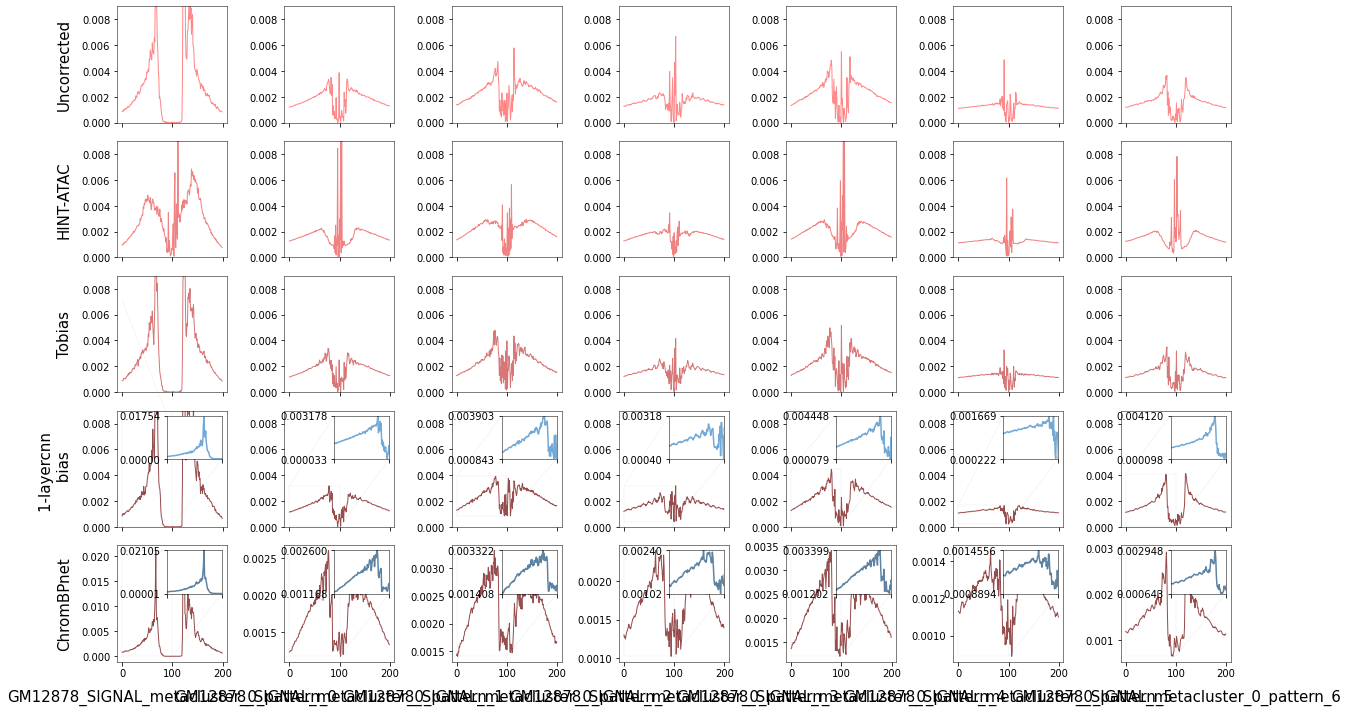

In [29]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
import matplotlib

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig,axs = plt.subplots(5,7,figsize=(17,10),sharey=False,sharex='col')
#motifs=["AP1", "ETS", "NFKB", "RUNX", "NRF1", "SPI1", "GATA+TAL"]
motifs=[]
for i in range(0,7):
    motifs.append("GM12878_SIGNAL_metacluster_0_pattern_"+str(i))
    
models = ["Uncorrected", "HINT-ATAC", "Tobias", "1-layercnn \n bias", "ChromBPnet"]
ylims=[0.009,0.009, 0.009, 0.009, 0.009, 0.009, 0.009]
for i in range(1,8):
    axs[0,i-1].plot(uncorrected[motifs[i-1]][0][400:600], alpha=0.8, label="uncorrected", c="#FF6A6A",linewidth=1)
    axs[1,i-1].plot(hint_atac[motifs[i-1]][0][400:600], alpha=0.8, label="hint-atac", c="#EE6363",linewidth=1)
    axs[2,i-1].plot(tobias[motifs[i-1]][0][400:600], alpha=0.8, label="tobias", c="#CD5555",linewidth=1)
    axs[3,i-1].plot(simple_bias[motifs[i-1]][0][400:600], alpha=0.9, label="chrombpnet", c="#8B3A3A",linewidth=1)
    axs[4,i-1].plot(chrombpnet[motifs[i-1]][0][400:600], alpha=0.9, label="chrombpnet", c="#8B3A3A",linewidth=1)


    axs[0,i-1].set_ylim([0, ylims[i-1]])
    axs[1,i-1].set_ylim([0, ylims[i-1]])
    axs[2,i-1].set_ylim([0, ylims[i-1]])
    axs[3,i-1].set_ylim([0, ylims[i-1]])
    
    #make_inset(uncorrected[motifs[i-1]][0][400:600],axs[0,i-1], color="#63B8FF")
    #make_inset(hint_atac[motifs[i-1]][0][400:600],axs[1,i-1], color="#4F94CD")
    make_inset(chrombpnet[motifs[i-1]][0][400:600],axs[4,i-1], color="#36648B")
    #make_inset(tobias[motifs[i-1]][0][400:600],axs[2,i-1],color="#4F94CD")
    make_inset(simple_bias[motifs[i-1]][0][400:600],axs[3,i-1],color="#4F94CD")


    #axs[3,i-1].xaxis.set_major_locator(plt.MaxNLocator(3))
    
for ax, col in zip(axs[:,0], models):
    ax.set_ylabel(col, rotation=90, labelpad=10, fontsize=15)

for ax, row in zip(axs[-1], motifs):
    ax.set_xlabel(row, rotation=0, labelpad=10, fontsize=15)


plt.savefig("marginal_footprints_on_motifs_zoomed_all.pdf", dpi=300)
#plt.savefig("marginal_footprints_on_motifs_zoomed_2.pdf", dpi=300)

fig.tight_layout()

0.014067053
0.003391537
0.0047970256
0.004157229
0.005161313
0.0032649694
0.003499492
0.0061501544
0.003946345
0.0023022825


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


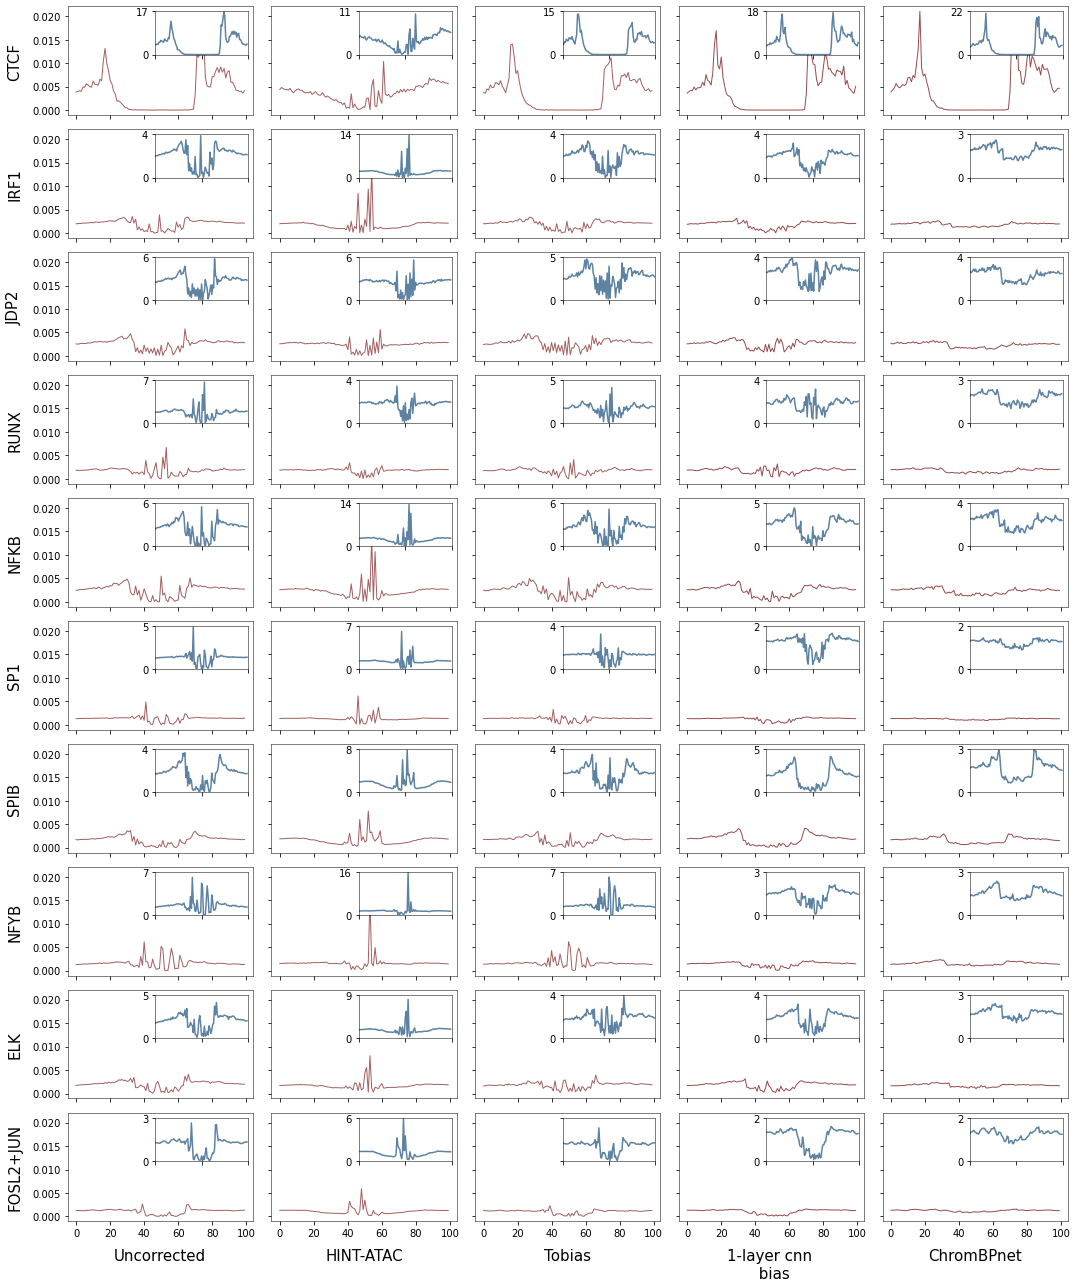

In [47]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
import matplotlib

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
matplotlib.rc('axes', linewidth=0.5) 

fig,axs = plt.subplots(10,5,figsize=(15,18),sharey=True,sharex='col')
#motifs=["AP1", "ETS", "NFKB", "RUNX", "NRF1", "SPI1", "GATA+TAL"]
motifs=[]
for i in range(0,10):
    motifs.append("GM12878_SIGNAL_metacluster_0_pattern_"+str(i))
    

models = ["Uncorrected", "HINT-ATAC", "Tobias", "1-layer cnn \n bias", "ChromBPnet"]
ylims=[0.009,0.009, 0.009, 0.009, 0.009, 0.009, 0.009]
for i in range(1,11):
    #print(motifs[i-1])
    axs[i-1,0].plot(uncorrected[motifs[i-1]][0][450:550], alpha=0.8, label="uncorrected", c="#8B3A3A",linewidth=1)
    axs[i-1,1].plot(hint_atac[motifs[i-1]][0][450:550], alpha=0.8, label="hint-atac", c="#8B3A3A",linewidth=1)
    axs[i-1,2].plot(tobias[motifs[i-1]][0][450:550], alpha=0.8, label="tobias", c="#8B3A3A",linewidth=1)
    axs[i-1,3].plot(simple_bias[motifs[i-1]][0][450:550], alpha=0.9, label="chrombpnet", c="#8B3A3A",linewidth=1)
    axs[i-1,4].plot(chrombpnet[motifs[i-1]][0][450:550], alpha=0.9, label="chrombpnet", c="#8B3A3A",linewidth=1)

    print(np.max(tobias[motifs[i-1]][0][450:550]))
    #axs[i-1,0].set_ylim([0, ylims[i-1]])
    #axs[i-1,1].set_ylim([0, ylims[i-1]])
    #axs[i-1,2].set_ylim([0, ylims[i-1]])
    #axs[i-1,3].set_ylim([0, ylims[i-1]])
    
    #make_inset(uncorrected[motifs[i-1]][0][400:600],axs[i-1,0], color="#63B8FF")
    #make_inset(hint_atac[motifs[i-1]][0][400:600],axs[i-1,1], color="#4F94CD")
    #if i!=1:
    if True:
        make_inset(uncorrected[motifs[i-1]][0][450:550],axs[i-1,0], color="#36648B")
        make_inset(hint_atac[motifs[i-1]][0][450:550],axs[i-1,1], color="#36648B")
        make_inset(chrombpnet[motifs[i-1]][0][450:550],axs[i-1,4], color="#36648B")
        make_inset(simple_bias[motifs[i-1]][0][450:550],axs[i-1,3], color="#36648B")
        make_inset(tobias[motifs[i-1]][0][450:550],axs[i-1,2],color="#36648B")

    #axs[3,i-1].xaxis.set_major_locator(plt.MaxNLocator(3))
    
motifs=["CTCF", "IRF1", "JDP2", "RUNX", "NFKB", "SP1", "SPIB", "NFYB", "ELK", "FOSL2+JUN"]
for ax, col in zip(axs[:,0], motifs):
    ax.set_ylabel(col, rotation=90, labelpad=10, fontsize=15)

for ax, row in zip(axs[-1], models):
    ax.set_xlabel(row, rotation=0, labelpad=10, fontsize=15)

#plt.tick_params(left = False, right = False , labelleft = False ,
#                labelbottom = True, bottom = True)

plt.yticks(visible=False)

plt.savefig("marginal_footprints_on_motifs_zoomed_all_1.pdf", dpi=300)
#plt.savefig("marginal_footprints_on_motifs_zoomed_2.pdf", dpi=300)


fig.tight_layout()